<a href="https://colab.research.google.com/github/roblee10/Artwork_Classification/blob/main/Example_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import os
import gc
import copy
import pandas as pd# 데이터 시각화 라이브러리
import matplotlib.pyplot as plt

In [2]:
!pip install timm
import timm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 509 kB 4.2 MB/s 


In [3]:
config = {}



In [2]:
from google.colab import drive # 구글 드라이브 마운트
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
PROJECT_PATH = '/content/drive/MyDrive/Artwork_Classification_Programmers' # 프로젝트 디렉토리

TRAIN_PATH = os.path.join(PROJECT_PATH,'train') # 학습 이미지 파일 디렉토리
TEST_PATH = os.path.join(PROJECT_PATH,'test') # 테스트 이미지 파일 디렉토리

In [ ]:
import zipfile

path_to_zip_file_train = os.path.join(PROJECT_PATH,'train.zip') # .zip 파일로 된 학습파일 경로
path_to_zip_file_test = os.path.join(PROJECT_PATH,'test.zip') # .zip 파일로 된 테스트파일 경로

with zipfile.ZipFile(path_to_zip_file_train, 'r') as zip_ref: # 학습 압축파일 읽어들이기
    zip_ref.extractall(PROJECT_PATH) # 프로젝트 디렉토리에 학습 압축파일 풀음

with zipfile.ZipFile(path_to_zip_file_test, 'r') as zip_ref: # 테스트 압축파일 읽어들이기
    zip_ref.extractall(PROJECT_PATH) # 프로젝트 디렉토리에 테스트 압축파일 풀음

In [5]:
# 각 레이블을 번호로 매칭
label2idx = {'dog': 0, 
             'elephant': 1,
             'giraffe': 2,
             'guitar': 3,
             'horse': 4,
             'house': 5,
             'person': 6}

# 각 번호를 레이블에 매칭
idx2label = {k:v for v,k in label2idx.items()} # dict.items() 는 key 와 value를 함께 for 문으로 return 해준다.


In [12]:
# 전체 이미지 파일들의 디렉토리를 저장하는 코드
labels = [] # 판다스에 담길 데이터 저장소
for path in os.walk(TRAIN_PATH): # TRAIN_PATH 경로 아래를 순차적으로 탐사
                                 # path[0] : 디렉토리 경로
                                 # path[1] : 현재 디렉토리에 존재하는 폴더 이름
                                 # path[2] : 현재 디렉토리에 존재하는 파일 이름

    label_type = path[0].split('/')[-1] # 현재 디렉토리 최하위 폴더 이름
    if label_type == 'train' : continue # 첫번째 탐사는 디렉토리는 이미지 폴더 아니므로 제외시킨다
    
    base_path = path[0] # 현재 디렉토리
    images = path[2] # 디렉토리 내 이미지 파일 이름

    idx = label2idx[label_type] # 각 레이블을 숫자로 변환
    for image in images: # 각 디렉토리의 이미지들 순차적으로 가져온다
        image_path = os.path.join(base_path,image) # 전체 이미지 파일의 디렉토리를 얻어내고
        label = {'img_path':image_path, # 이미지 전체 경로 저장
                 'label': idx} # 변환된 인덱스 저장
        labels.append(label)


train_df = pd.DataFrame(labels)
train_df = train_df.sort_values(['label','img_path']) # label 값 기준으로 오름차순 정렬하고, 
                                                        # 동일 값이 나오면 image_path 기준 오름차순 정렬
train_df = train_df.reset_index(drop = True) # sort 되기 전의 index를 버리고 새로 순서대로 다시 지정
train_df.head(5) # 위에서부터 5개 출력


,index,img_path,label
0,0,/content/drive/MyDrive/Artwork_Classification_...,0
1,1,/content/drive/MyDrive/Artwork_Classification_...,0
2,2,/content/drive/MyDrive/Artwork_Classification_...,0
3,7,/content/drive/MyDrive/Artwork_Classification_...,0
4,9,/content/drive/MyDrive/Artwork_Classification_...,0


In [20]:
labels = []
for path in os.walk(TEST_PATH):
    base_path = path[0]
    if base_path.split('/')[-1] == 'test' : continue
    imgages = path[2]

    idx = -1
    for image in images:
        img_path = os.path.join(base_path,image)
        label = {'img_path' : img_path,
                  'iabel' : idx}
        labels.append(label)
test_df = pd.DataFrame(labels)
test_df = test_df.sort_values(['img_path'])
test_df = test_df.reset_index(drop=True)
test_df.head(5)

('/content/drive/MyDrive/Artwork_Classification_Programmers/test', ['0'], [])
('/content/drive/MyDrive/Artwork_Classification_Programmers/test/0', [], ['0001.jpg', '0002.jpg', '0003.jpg', '0004.jpg', '0005.jpg', '0006.jpg', '0007.jpg', '0008.jpg', '0009.jpg', '0010.jpg', '0011.jpg', '0012.jpg', '0013.jpg', '0014.jpg', '0015.jpg', '0016.jpg', '0017.jpg', '0018.jpg', '0019.jpg', '0020.jpg', '0021.jpg', '0022.jpg', '0023.jpg', '0024.jpg', '0025.jpg', '0026.jpg', '0027.jpg', '0028.jpg', '0029.jpg', '0030.jpg', '0031.jpg', '0032.jpg', '0033.jpg', '0034.jpg', '0035.jpg', '0036.jpg', '0037.jpg', '0038.jpg', '0039.jpg', '0040.jpg', '0041.jpg', '0042.jpg', '0043.jpg', '0044.jpg', '0045.jpg', '0046.jpg', '0047.jpg', '0048.jpg', '0049.jpg', '0050.jpg', '0051.jpg', '0052.jpg', '0053.jpg', '0054.jpg', '0055.jpg', '0056.jpg', '0057.jpg', '0058.jpg', '0059.jpg', '0060.jpg', '0061.jpg', '0062.jpg', '0063.jpg', '0064.jpg', '0065.jpg', '0066.jpg', '0067.jpg', '0068.jpg', '0069.jpg', '0070.jpg', '0071.jp

,img_path,iabel
0,/content/drive/MyDrive/Artwork_Classification_...,-1
1,/content/drive/MyDrive/Artwork_Classification_...,-1
2,/content/drive/MyDrive/Artwork_Classification_...,-1
3,/content/drive/MyDrive/Artwork_Classification_...,-1
4,/content/drive/MyDrive/Artwork_Classification_...,-1


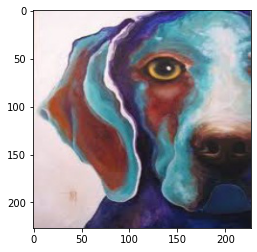

In [19]:
image = plt.imread(train_df['img_path'][0]) # 이미지 읽기
plt.imshow(image) # 이미지 출력

In [21]:
train_df.groupby('label').count()

,index,img_path
label,,
0,329,329
1,205,205
2,235,235
3,134,134
4,151,151
5,245,245
6,399,399
